<a href="https://colab.research.google.com/github/jacmal/RL-Crypto-Trading-AI-BOT/blob/main/DF_TechnicalIndicators_Prophet_for_RL_BOT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt
import json
import requests
import io

from collections import deque
from datetime import datetime

In [ ]:
plt.style.use('dark_background')

In [ ]:
# DEV PART

# load data sets
url_btc = "https://raw.githubusercontent.com/jacmal/crypto/main/data_sets/Binance_BTCUSDT_1h.csv"
url_eth = "https://raw.githubusercontent.com/jacmal/crypto/main/data_sets/Binance_ETHUSDT_1h.csv"
#url_bnb = "https://raw.githubusercontent.com/jacmal/crypto/main/data_sets/Binance_BNBUSDT_1h.csv"

site_btc = requests.get(url_btc).content
#site_eth = requests.get(url_eth).content

df_btc = pd.read_csv(io.StringIO(site_btc.decode('utf-8')))
#df_eth = pd.read_csv(io.StringIO(site_eth.decode('utf-8')))

# reverse data sets
df_btc = df_btc.loc[::-1].reset_index(drop=True)
df_btc = df_btc.iloc[1:,:]

#df_eth = df_eth.loc[::-1].reset_index(drop=True)
#df_eth = df_eth.iloc[1:,:]

#
col_to_drop = ['unix', 'symbol', 'Volume USDT', 'tradecount', 'Volume BTC']

df_btc.drop(labels=col_to_drop, axis=1, inplace=True)
#df_eth.drop(labels=col_to_drop, axis=1, inplace=True)

#df_btc.set_index('date', drop=True, inplace=True)
#df_eth.set_index('date', drop=True, inplace=True)

df_btc['Open_btc'] = df_btc['open'].copy()

df_btc.head(2)

,date,open,high,low,close,Open_btc
1,2017-08-17 05-AM,4308.83,4328.69,4291.37,4315.32,4308.83
2,2017-08-17 06-AM,4315.32,4345.45,4309.37,4324.35,4315.32


In [ ]:
df_btc.tail(2)

,date,open,high,low,close,Open_btc
41094,2022-01-05 23:00:00,43437.04,43709.12,43212.00,43451.13,43437.04
41095,2022-01-06 00:00:00,43451.14,43615.71,43261.62,43600.90,43451.14


In [ ]:
# DEV test data point
test_dpoint = df_btc.head(1).copy()
test_dpoint

,date,open,high,low,close,Open_btc
1,2017-08-17 05-AM,4308.83,4328.69,4291.37,4315.32,4308.83


In [ ]:
class ProphetPredictor:
    def __init__(self):
        pass

In [ ]:
class TradingDFautoPipeline:
    def __init__(self):
        self.df = pd.DataFrame()

    def load_df_csv(self, load_path):
        self.df = pd.read_csv(load_path)

    def get_df(self, trading_df):
        self.df = trading_df.copy()
    
    def get_and_add_data_point(self, df_data_row):
        self.df = pd.concat((self.df, df_data_row), ignore_index=True, axis=0)

################################################################################

    def add_sma(self, window_size=12, col_name='close'): # SIMPLE MOVING AVERAGE
        self.df['sma_'+str(window_size)] = self.df[col_name].rolling(window=window_size).mean()
    
    # DEV test function
    def test_dpoint_sma(self):
        pass

    def add_short_long_sma_positions(self, short_sma_windwo=7, long_sma_window=30, col_name='close'): # STRATEGY POSITION
        short_sma = self.df[col_name].rolling(window=short_sma_windwo).mean()
        long_sma = self.df[col_name].rolling(window=long_sma_window).mean()

        self.df[f'position_sma_{str(short_sma_windwo)}-{str(long_sma_window)}'] = np.where(short_sma > long_sma, 1, -1)
    
    def add_difference(self, col_name='close'):
        self.df['diff'] = self.df[col_name] - self.df[col_name].shift(1)
    
    def add_diff_percentage(self, col_name='close'):
        self.df['diff_%'] = (self.df[col_name] - self.df[col_name].shift(1)) / self.df[col_name].shift(1)
    
    def add_diff_percentage_round(self, col_name='close'):
        self.df['diff_%_round'] = round((self.df[col_name] - self.df[col_name].shift(1)) / self.df[col_name].shift(1)*100, 1)
    
    def add_diff_percentage_bin(self, col_name='close'):
        #self.df.dropna(inplace=True)
        self.df['diff_%_bin'] = round((self.df[col_name] - self.df[col_name].shift(1)) / self.df[col_name].shift(1)*100)
    
    def add_returns(self, col_name='close'):
        '''
        Create new columns - logarithimc returns.
        '''
        #self.df.dropna(inplace=True)
        #self.df.reset_index(drop=True, inplace=True)
        self.df['returns'] = np.log(self.df[col_name].div(self.df[col_name].shift(1)))

    def add_returns_cumsum(self, col_name='close'):
        returns = np.log(self.df[col_name].div(self.df[col_name].shift(1)))
        
        self.df['returns_cumsum'] = returns.cumsum().apply(np.exp)
    
    def add_returns_cummax(self, col_name='close'): # DEV Test
        returns = np.log(self.df[col_name].div(self.df[col_name].shift(1)))
        
        self.df['returns_cummax'] = returns.cummax() #.apply(np.exp)

    def add_return_drowdown(self, col_name='close'): # DEV Test
        returns = np.log(self.df[col_name].div(self.df[col_name].shift(1)))
        cum_max = returns.cummax() #.apply(np.exp)
        
        self.df['drop_down'] = cum_max - returns
    
    def add_percentage_mean_window(self):
        pass

    def add_percentage_sum_windwow(self):
        pass
    
    def prophet_future_prediction(self):
        pass
    
    def train_labels_creator_UP_ZERO_DOWN(self, col_name='close', tresh_hold=0.3):
        actual_value = self.df[col_name]
        next_value = self.df[col_name].shift(-1)
        percentage_value_change = round((next_value - actual_value) / actual_value, 1)
        
        set_ones = np.where(percentage_value_change >= tresh_hold, 1, percentage_value_change)
        set_m_ones = np.where(set_ones <= -tresh_hold, -1, set_ones)
        up_zero_down = np.where((set_m_ones != -1) & (set_m_ones != 1), 0, set_m_ones)
        
        self.df[f'y_next_val_{str(tresh_hold)}'] = up_zero_down

    def train_labels_creator_RANGED_MEAN(self, col_name='close', window_size=7):
        actual_value = self.df[col_name]
        next_value = self.df[col_name].shift(-window_size)
        percentage_value_change = (next_value - actual_value) / actual_value 
        next_mean = percentage_value_change.rolling(window=window_size).mean()

        self.df[f'y_next_mean_{str(window_size)}'] = round(next_mean*100, 1)

    def count_range_probability_distribution(self, all=True, window_size=7, min_max=10, col_name='diff_%_bin'):
        if all == True:
            lenbin = len(range(-min_max, min_max+1, 1))
            count_dict = {bin: val for bin, val in zip(range(-min_max, min_max+1, 1), np.zeros(lenbin))}
            probs_dict = {bin: val for bin, val in zip(range(-min_max, min_max+1, 1), np.zeros(lenbin))}
            #print(count_dict)

            values = self.df[col_name].value_counts()
            sum_values = sum(values)

            for idx, val in zip(values.index, values):
                probs = round(val / sum_values, 3)
                if idx in list(count_dict.keys()):
                    count_dict[idx] = val
                    probs_dict[idx] = probs
            
            #print(idx, val, probs)
            return count_dict, probs_dict

        else:
            pass

    def data_hist(self, col_name='diff_%_bin'):
        self.df[col_name].hist();
    
    def add_all_indicators_train(self):
        self.add_diff_percentage()
        self.add_difference()
        self.add_diff_percentage()
        self.add_diff_percentage_round()
        self.add_diff_percentage_bin()
        self.add_returns()
        self.add_returns_cumsum()

        # DEV testing
        # drop first row "NaN" afetr transformation above
        self.df.dropna(inplace=True)
        # convert to int
        self.df['diff_%_bin'] = self.df['diff_%_bin'].astype(int)

        # create a lot of "NaN"
        self.add_sma()
        self.add_short_long_sma_positions()

    def add_all_LABELS_TRAIN(self):
        self.train_labels_creator_UP_ZERO_DOWN()
        self.train_labels_creator_RANGED_MEAN()

    def add_all_indicators_data_point(self):
        pass

    def save_df_to_csv(self, save_path):
        pass

    def return_df(self):
        return self.df
    
    def return_training_window(self):
        pass

    def return_df_window(self, window_size=7):
        return self.df.tail(window_size).copy()

In [ ]:
arr = np.array([-2,-1.5,-1,-0.5, -0.4, -0.3, -0.2, 0, 0.2, 0.3, 0.4, 0.5, 1, 2])
arr_1 = np.where(arr >= 0.3, 1, arr)
arr_2 = np.where(arr_1 <= -0.3, -1, arr_1)
arr_3 = np.where((arr_2 != -1) & (arr_2 != 1), 0, arr_2)
arr_3

array([-1., -1., -1., -1., -1., -1.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,
        1.])

In [ ]:
tdf = TradingDFautoPipeline()
tdf.get_df(df_btc)
tdf.get_and_add_data_point(test_dpoint)
#tdf.return_df().tail(3)

In [ ]:
tdf.add_all_indicators_train()
tdf.df.head(3)

,date,open,high,low,close,Open_btc,diff_%,diff,diff_%_round,diff_%_bin,returns,returns_cumsum,sma_12,position_sma_7-30
1,2017-08-17 06-AM,4315.32,4345.45,4309.37,4324.35,4315.32,0.002093,9.03,0.2,0,0.002090,1.002093,NaN,-1
2,2017-08-17 07-AM,4324.35,4349.99,4287.41,4349.99,4324.35,0.005929,25.64,0.6,1,0.005912,1.008034,NaN,-1
3,2017-08-17 08-AM,4349.99,4377.85,4333.32,4360.69,4349.99,0.002460,10.70,0.2,0,0.002457,1.010514,NaN,-1


In [ ]:
tdf.df.tail(3)

,date,open,high,low,close,Open_btc,diff_%,diff,diff_%_round,diff_%_bin,returns,returns_cumsum,sma_12,position_sma_7-30
41093,2022-01-05 23:00:00,43437.04,43709.12,43212.00,43451.13,43437.04,0.000324,14.08,0.0,0,0.000324,10.069040,45280.150000,-1
41094,2022-01-06 00:00:00,43451.14,43615.71,43261.62,43600.90,43451.14,0.003447,149.77,0.3,0,0.003441,10.103747,45061.059167,-1
41095,2017-08-17 05-AM,4308.83,4328.69,4291.37,4315.32,4308.83,-0.901027,-39285.58,-90.1,-90,-2.312906,1.000000,41550.668333,-1


In [ ]:
tdf.add_all_LABELS_TRAIN()
tdf.df.tail(3)

,date,open,high,low,close,Open_btc,diff_%,diff,diff_%_round,diff_%_bin,returns,returns_cumsum,sma_12,position_sma_7-30,y_next_val_0.3,y_next_mean_7
41093,2022-01-05 23:00:00,43437.04,43709.12,43212.00,43451.13,43437.04,0.000324,14.08,0.0,0,0.000324,10.069040,45280.150000,-1,0.0,NaN
41094,2022-01-06 00:00:00,43451.14,43615.71,43261.62,43600.90,43451.14,0.003447,149.77,0.3,0,0.003441,10.103747,45061.059167,-1,-1.0,NaN
41095,2017-08-17 05-AM,4308.83,4328.69,4291.37,4315.32,4308.83,-0.901027,-39285.58,-90.1,-90,-2.312906,1.000000,41550.668333,-1,0.0,NaN


In [ ]:
tdf.df.tail(10)

,date,open,high,low,close,Open_btc,diff_%,diff,diff_%_round,diff_%_bin,returns,returns_cumsum,sma_12,position_sma_7-30,y_next_val_0.3,y_next_mean_7
41086,2022-01-05 16:00:00,46622.53,46674.37,46282.05,46301.62,46622.53,-0.006883,-320.91,-0.7,-1,-0.006907,10.729591,46502.873333,1,0.0,-4.4
41087,2022-01-05 17:00:00,46301.62,46469.66,46001.00,46010.72,46301.62,-0.006283,-290.90,-0.6,-1,-0.006303,10.662180,46478.533333,-1,0.0,-4.9
41088,2022-01-05 18:00:00,46010.72,46365.68,45550.00,45919.92,46010.72,-0.001973,-90.80,-0.2,0,-0.001975,10.641139,46434.360000,-1,0.0,-17.7
41089,2022-01-05 19:00:00,45919.93,46118.85,44500.00,44685.93,45919.93,-0.026873,-1233.99,-2.7,-3,-0.027240,10.355183,46290.895000,-1,0.0,NaN
41090,2022-01-05 20:00:00,44685.93,44847.99,43722.54,43967.01,44685.93,-0.016088,-718.92,-1.6,-2,-0.016219,10.188586,46067.973333,-1,0.0,NaN
41091,2022-01-05 21:00:00,43967.01,44331.42,43422.54,43606.37,43967.01,-0.008203,-360.64,-0.8,-1,-0.008236,10.105014,45796.925833,-1,0.0,NaN
41092,2022-01-05 22:00:00,43602.49,43815.20,42500.00,43437.05,43602.49,-0.003883,-169.32,-0.4,0,-0.003890,10.065777,45515.138333,-1,0.0,NaN
41093,2022-01-05 23:00:00,43437.04,43709.12,43212.00,43451.13,43437.04,0.000324,14.08,0.0,0,0.000324,10.069040,45280.150000,-1,0.0,NaN
41094,2022-01-06 00:00:00,43451.14,43615.71,43261.62,43600.90,43451.14,0.003447,149.77,0.3,0,0.003441,10.103747,45061.059167,-1,-1.0,NaN
41095,2017-08-17 05-AM,4308.83,4328.69,4291.37,4315.32,4308.83,-0.901027,-39285.58,-90.1,-90,-2.312906,1.000000,41550.668333,-1,0.0,NaN


In [ ]:
tdf.return_percentage_count_and_probs()

{-10: 2, -9: 8, -8: 10, -7: 14, -6: 24, -5: 46, -4: 118, -3: 292, -2: 991, -1: 4753, 0: 28119, 1: 5282, 2: 916, 3: 305, 4: 109, 5: 48, 6: 22, 7: 12, 8: 6, 9: 5, 10: 0.0}
{-10: 0.0, -9: 0.0, -8: 0.0, -7: 0.0, -6: 0.001, -5: 0.001, -4: 0.003, -3: 0.007, -2: 0.024, -1: 0.116, 0: 0.684, 1: 0.129, 2: 0.022, 3: 0.007, 4: 0.003, 5: 0.001, 6: 0.001, 7: 0.0, 8: 0.0, 9: 0.0, 10: 0.0}


In [ ]:
values = tdf.df['diff_%_bin'].value_counts()
sum_values = sum(values)

for idx, val in zip(values.index, values):
    probs = round(val / sum_values, 3)
    print(idx, val, probs)

0 28119 0.684
1 5282 0.129
-1 4753 0.116
-2 991 0.024
2 916 0.022
3 305 0.007
-3 292 0.007
-4 118 0.003
4 109 0.003
5 48 0.001
-5 46 0.001
-6 24 0.001
6 22 0.001
-7 14 0.0
7 12 0.0
-8 10 0.0
-9 8 0.0
8 6 0.0
9 5 0.0
11 3 0.0
12 3 0.0
-10 2 0.0
14 2 0.0
-18 1 0.0
-17 1 0.0
-11 1 0.0
17 1 0.0
-90 1 0.0


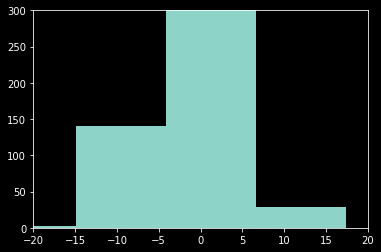

In [ ]:
plt.hist(tdf.df['diff_%_bin'])
plt.xlim(-20,20)
plt.ylim(0,300)
plt.show();

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


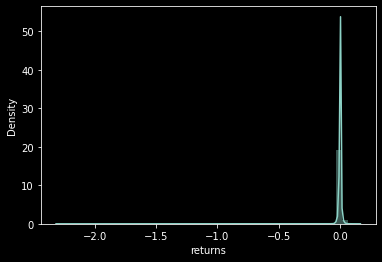

In [ ]:
import seaborn as sns
sns.distplot(a=tdf.df['returns'], bins=None, hist=True, kde=True, rug=False, fit=None, 
             hist_kws=None, kde_kws=None, rug_kws=None, fit_kws=None, color=None, vertical=False, 
             norm_hist=False, axlabel=None, label=None, ax=None, x=None)
#plt.xlim(-20,20)
#plt.ylim(0,300)
#plt.show();

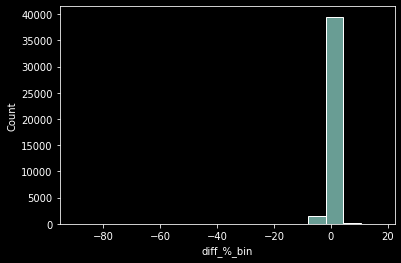

In [ ]:
sns.histplot(data=tdf.df['diff_%_bin'], x=None, y=None, hue=None, weights=None, stat='count', bins='auto', binwidth=None, binrange=None, discrete=None, cumulative=False, common_bins=True, common_norm=True, multiple='layer', element='bars', fill=True, shrink=1, kde=False, kde_kws=None, line_kws=None, thresh=0, pthresh=None, pmax=None, cbar=False, cbar_ax=None, cbar_kws=None, palette=None, hue_order=None, hue_norm=None, color=None, log_scale=None, legend=True, ax=None)

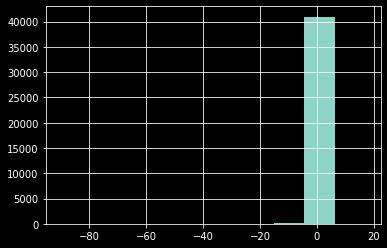

In [ ]:
tdf.data_hist()